# Stack Overflow Survey 2020 - Data Analysis
## Import Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Import Data

In [37]:
df=pd.read_csv('data/survey_results_public.csv')
languages = set(';'.join(df['LanguageWorkedWith'].dropna()).split(';'))
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

## Data Wrangling

In [38]:
def create_language_columns(df):
    '''
    Create column for each of the available languages in the dataset with a Boolean value:
        True -> If the language is contained in the LanguageWorkedWith column
        False -> otherwise.

    Input: Pandas dataframe (df)
    Output: none.
    '''
    for language in languages:
        df.loc[:,language] = df['LanguageWorkedWith'].apply(lambda x: language in x if pd.notnull(x) else False)

In [39]:
def isNaN(x):
    return x!=x

In [40]:
def proExpRange(x):
    '''
    Defines ProExpRange based on cell value.
    
    Input: Number or string.
    Output: ProExpRange classification.
    '''
    if isNaN(x):
        return math.nan
    elif x == 'More than 50 years':
        return '5) 10 or more years'
    elif x == 'Less than 1 year':
        return '1) Less than 1 year'
    elif int(x)<=3:
        return '2) 1 to 3 years'
    elif int(x)<=6:
        return '3) 4 to 6 years'
    elif int(x)<=9:
        return '4) 6 to 9 years'
    else:
        return '5) 10 or more years'

In [41]:
def create_proexprange_column(df):
    '''
    Create a column with range classification based on Professional Coding Experience in years.
    The column can have one of the following values:
        -> math.nan
        -> '1) Less than 1 year'
        -> '2) 1 to 3 years'
        -> '3) 4 to 6 years'
        -> '4) 6 to 9 years'
        -> '5) 10 or more years'

    Input: Pandas dataframe (df)
    Output: None.
    '''
    df.loc[:,'ProExpRange'] = df['YearsCodePro'].apply(proExpRange)

In [42]:
def devs_avg_income_per_lang(df):
    '''
    Creates a dataframe with average salaries per language
    
    Input: Pandas dataframe (df)
    Output: Pandas dataframe with language, devs_count, avg_income 
    '''
    devs_count=[]
    avg_income=[]
    for language in languages:
        devs=df[df[language]==True]['ConvertedComp'].count()
        devs_count.append(devs)

        avg=df[df[language]==True]['ConvertedComp'].mean()
        avg_income.append(avg)

    data={'lang':list(languages),'devs_count':devs_count,'avg_income':avg_income}
    
    return pd.DataFrame(data)

In [43]:
def devs_per_lang(df):
    '''
    Creates a dataframe with devs per language
    
    Input: Pandas dataframe (df)
    Output: Pandas dataframe with language, devs_count
    '''
    devs_count=[]
    
    for language in languages:
        devs=df[language].sum()
        devs_count.append(devs)

    data={'lang':list(languages),'devs_count':devs_count}
    
    return pd.DataFrame(data)

In [44]:
def annotate_df(row):
    '''
    Annotates a plot of a Dataframe.
    '''
    l=['Objective-C','Haskell','Assembly','C']
    
    ax.annotate(
        text=row.values[0],
        xy=(row.values[2],row.values[1]),
        xytext=(-2,-12) if row.values[0] in l else (-2,5),
        textcoords='offset points',
        size=10,
        family='monospace'
        )

In [45]:
def normalize_data(df,col):
    '''
    Normalize a column 'col'.

    Input:
        df: dataframe that contains 'col'
        col: desired column to be normalized
    
    Output: normalized column.
    '''
    maximum = df[col].max()
    minimum = df[col].min()
    normalized = (df[col]-minimum)/(maximum-minimum)

    return normalized

In [46]:
def create_col_d(df, col1, col2):
    '''
    Creates 'd' column which is the normalized distance between a point in a 2 dimensional space and the axes center.

    Input:
        df: desired dataframe to create column 'd'
        col1: column with 'x' values (str)
        col2: column with 'y' values (str)
    
    Output: None.
    '''

    df.loc[:,'d']=np.sqrt(normalize_data(df,col1)**2 + normalize_data(df,col2)**2)/np.sqrt(2)

In [47]:
create_language_columns(df)
create_proexprange_column(df)

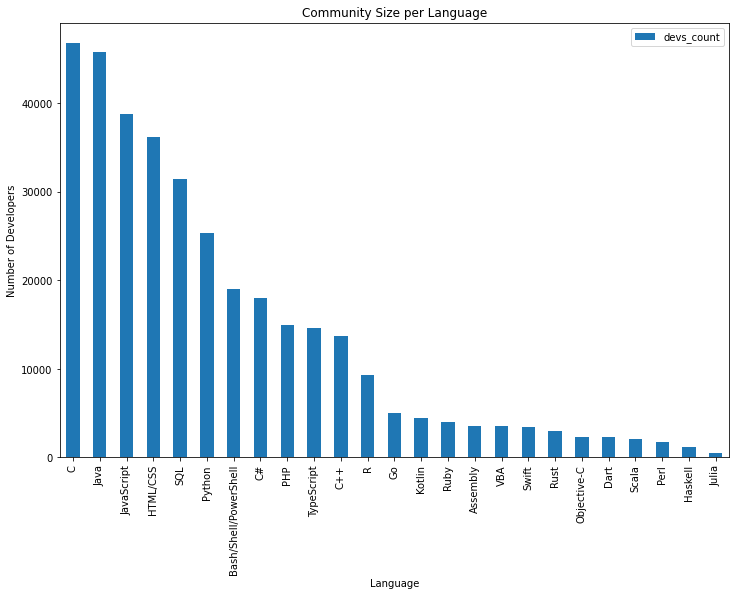

In [48]:
df_devs = devs_per_lang(df).sort_values('devs_count', ascending=False)
df_devs.plot(
    kind='bar', 
    x='lang',
    xlabel='Language',
    figsize=[12,8],
    ylabel='Number of Developers',
    title='Community Size per Language'
    )
plt.savefig('Community Size per Language')

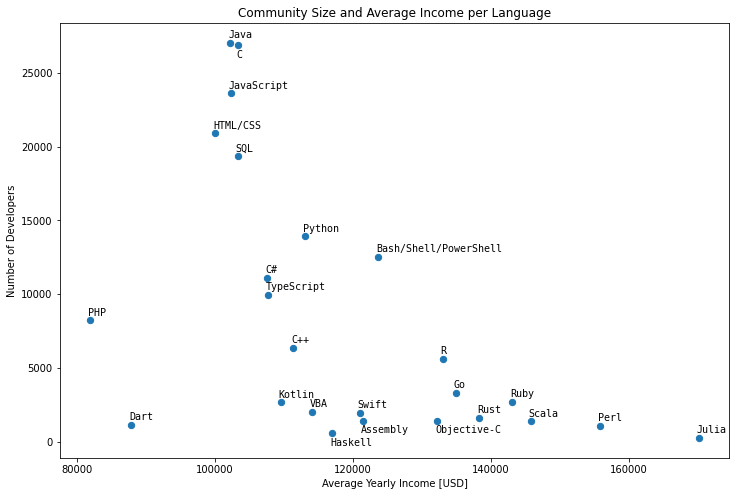

In [49]:
df_lang = devs_avg_income_per_lang(df)
create_col_d(df_lang, 'avg_income', 'devs_count')

ax=df_lang.plot(
    x='avg_income',
    y='devs_count', 
    kind='scatter', 
    s=40,
    figsize=[12,8],
    xlabel='Average Yearly Income [USD]',
    ylabel='Number of Developers',
    title='Community Size and Average Income per Language'
    )

df_lang.apply(annotate_df,axis=1)
plt.savefig('Community Size and Average Income per Language')

In [50]:
df_lang

,lang,devs_count,avg_income,d
0,Rust,1628,138282.399877,0.453383
1,Python,13931,113061.525519,0.438858
2,SQL,19340,103281.520372,0.531864
3,C#,11104,107592.112122,0.352659
4,Haskell,564,116999.764184,0.281340
5,Ruby,2681,143067.032451,0.494483
6,HTML/CSS,20907,100018.777252,0.563845
7,VBA,2006,114026.976570,0.261541
8,C++,6358,111340.135263,0.285695
9,JavaScript,23619,102280.804691,0.637611


In [51]:
normalize_data(df_lang, 'devs_count')

0     0.051717
1     0.510459
2     0.712144
3     0.405049
4     0.012044
5     0.090980
6     0.770573
7     0.065812
8     0.228085
9     0.871695
10    0.043961
11    0.199896
12    0.063686
13    0.457623
14    0.114881
15    0.030985
16    0.043439
17    0.297811
18    0.090048
19    0.033260
20    0.993214
21    0.362467
22    1.000000
23    0.000000
24    0.042358
Name: devs_count, dtype: float64

In [52]:
df_lang

,lang,devs_count,avg_income,d
0,Rust,1628,138282.399877,0.453383
1,Python,13931,113061.525519,0.438858
2,SQL,19340,103281.520372,0.531864
3,C#,11104,107592.112122,0.352659
4,Haskell,564,116999.764184,0.281340
5,Ruby,2681,143067.032451,0.494483
6,HTML/CSS,20907,100018.777252,0.563845
7,VBA,2006,114026.976570,0.261541
8,C++,6358,111340.135263,0.285695
9,JavaScript,23619,102280.804691,0.637611


In [53]:
np.sqrt(normalize_data(df_lang,'devs_count')**2 + normalize_data(df_lang,'avg_income')**2)

0     0.641180
1     0.620639
2     0.752169
3     0.498735
4     0.397874
5     0.699304
6     0.797397
7     0.369875
8     0.404034
9     0.901718
10    0.450400
11    0.612439
12    0.447317
13    0.657994
14    0.611179
15    0.837507
16    0.571422
17    0.297811
18    0.325672
19    0.075212
20    1.022623
21    0.465839
22    1.026190
23    1.000000
24    0.725019
dtype: float64